In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('gurgaon_properties_final.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,super_built_up_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,ashiana apartment,sector 23,0.16,2051.0,2.0,2.0,2,1.0,Moderately Old,780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,house,independent,sector 39,1.80,21871.0,1.0,1.0,2,3.0,Relatively New,766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,house,vipul tatvam villa,sector 48,7.35,22812.0,4.0,5.0,2,2.0,Moderately Old,3222.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,144.0
3,flat,mapsko casa bella,sector 82,3.00,6134.0,4.0,6.0,3+,25.0,Relatively New,4890.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,119.0
4,flat,ansal heights 86,sector 86,0.64,4706.0,2.0,2.0,1,3.0,New Property,1360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0


In [5]:
latlong = pd.read_csv('latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'super_built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'Wardrobe', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','super_built_up_area','latitude','longitude']]

<ipython-input-12-c3e4a47cf9b9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','super_built_up_area','latitude','longitude']]


In [13]:
group_df

,price,price_per_sqft,super_built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3290.944444,28.4484,77.0210
manesar,0.961515,4717.878788,2235.636364,28.3515,76.9428
sector 1,1.860000,8249.833333,2431.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1763.457944,28.4750,76.9715
sector 103,1.495000,7445.785714,1991.095238,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.941089,5932.425743,1666.816337,28.4079,76.9153
sector 93,0.848889,8009.888889,1111.222222,28.4153,76.9326
sector 95,0.475714,5503.553571,1759.285714,28.4172,76.9081


In [14]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='super_built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [15]:
new_df.to_csv('data_viz1.csv',index=False)

In [19]:
df1 = pd.read_csv('/content/gurgaon_properties.csv')

In [20]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 23A Gurgaon,flat,ashiana apartment,0.16,2051.0,780.0,Super Built up area 780(72.46 sq.m.),2,2,2,not available,"Sector 23A Gurgaon, Gurgaon, Haryana",1.0,Na,5 to 10 Year Old,"['HUDA Sector 23 Market', 'Palam triangle', 'P...",Residential apartment for sell.Located on 1st ...,[],NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,34 Bedroom House for sale in Manohar Nagar,house,manohar nagar,5.60,12444.0,4500.0,Plot area 500(418.06 sq.m.)Built Up area: 500 ...,34,34,3+,not available,"230/26, Manohar Nagar, Gurgaon, Haryana",4.0,NaN,0 to 1 Year Old,"['Shiv Mahima Patient Care Bureau', 'Navjeevan...",This is a newly constructed building. With pro...,"['36 Fan', '51 Light', 'No AC', 'No Bed', 'No ...",NaN,NaN
2,1 Bedroom House for sale in Sector 39 Gurgaon,house,independent,1.80,21875.0,823.0,Plot area 900(83.61 sq.m.)Built Up area: 800 s...,1,1,2,not available,"00., Sector 39 Gurgaon, Gurgaon, Haryana",3.0,North-East,1 to 5 Year Old,"['Axis bank ATM', 'State bank of india ATM', '...",1bhk residential house for resale in sector 39...,Na,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
3,4 Bedroom House for sale in Sector 48 Gurgaon,house,vipul tatvam villa,7.35,22812.0,3222.0,Plot area 358(299.33 sq.m.),4,5,2,"servant room,store room,study room,pooja room","001, Sector 48 Gurgaon, Gurgaon, Haryana",2.0,South,5 to 10 Year Old,"['Athena', 'Star Mall', 'The Sixth Element Sch...",Tatvam villas is one of the most luxurious res...,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '14 L...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
4,4 BHK Flat in Sector 82 Gurgaon,flat,mapsko casa bella,3.00,6134.0,4891.0,Super Built up area 4890(454.3 sq.m.),4,6,3+,"pooja room,servant room","A1-2501, Sector 82 Gurgaon, Gurgaon, Haryana",25.0,West,1 to 5 Year Old,"['Vatika City Centre Mall', 'Pataudi Road', 'B...",Best location and amazing view from the pentho...,"['1 Water Purifier', '12 Fan', '1 Exhaust Fan'...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area4.5 out of 5', 'Construction4 out ..."


In [21]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [22]:
wordcloud_df.head()

,features,sector
0,NaN,sector 23
1,NaN,sector 39
2,NaN,sector 48
3,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 82
4,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 86


In [23]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [24]:
from wordcloud import WordCloud

In [25]:
feature_text = ' '.join(main)

In [26]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

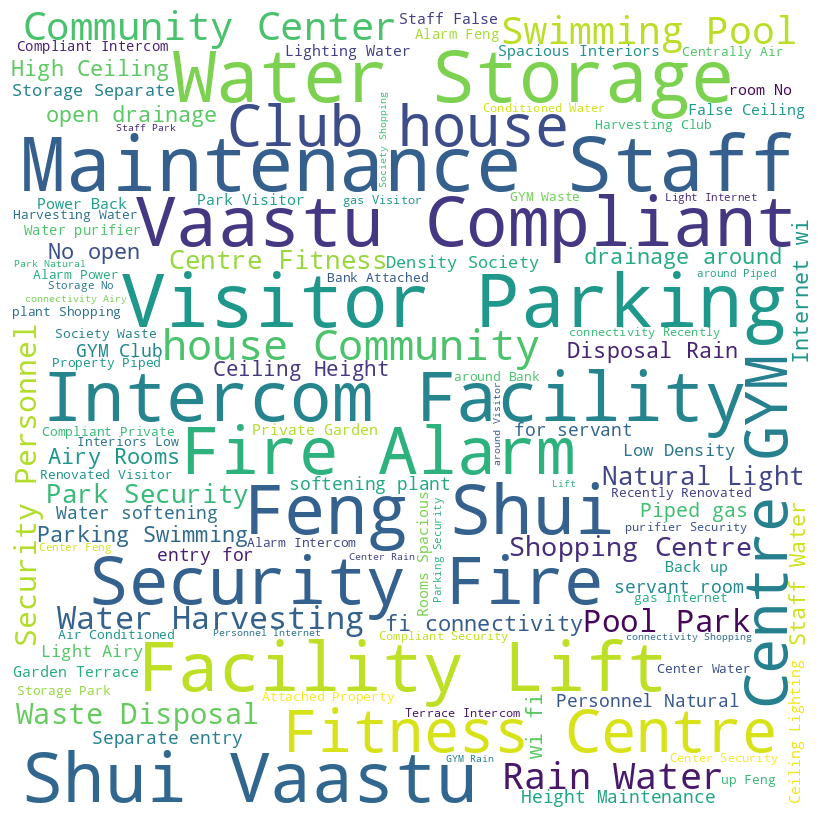

In [27]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()

In [28]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [29]:
fig = px.scatter(df, x="super_built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [30]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [31]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

<ipython-input-32-dc32b660127e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-32-dc32b660127e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

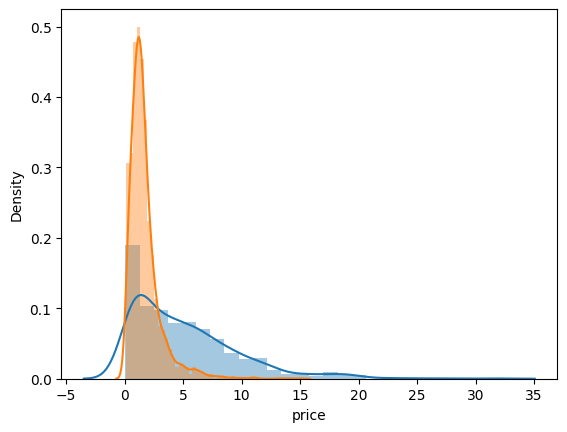

In [32]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [33]:
new_df['sector'].unique().tolist().insert(0,'overall')

In [34]:
new_df

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,ashiana apartment,sector 23,0.16,2051.0,2.0,2.0,2,1.0,Moderately Old,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.5121° N, 77.0478° E",28.5121,77.0478
1,house,independent,sector 23,4.00,16006.0,3.0,3.0,2,2.0,Moderately Old,...,1.0,0.0,0.0,0.0,3.0,1.0,115.0,"28.5121° N, 77.0478° E",28.5121,77.0478
2,house,independent,sector 23,5.00,16244.0,4.0,4.0,2,2.0,Old Property,...,0.0,0.0,0.0,0.0,4.0,1.0,7.0,"28.5121° N, 77.0478° E",28.5121,77.0478
3,house,independent,sector 23,5.50,21825.0,8.0,8.0,2,3.0,Moderately Old,...,1.0,0.0,1.0,0.0,8.0,1.0,76.0,"28.5121° N, 77.0478° E",28.5121,77.0478
4,house,independent,sector 23,2.40,12000.0,3.0,3.0,2,2.0,Moderately Old,...,0.0,1.0,1.0,0.0,0.0,0.0,28.0,"28.5121° N, 77.0478° E",28.5121,77.0478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,flat,vatika xpressions,sector 88b,0.92,6815.0,2.0,2.0,3,3.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4446° N, 76.9542° E",28.4446,76.9542
3362,flat,vatika xpressions,sector 88b,0.92,7360.0,2.0,2.0,2,3.0,Relatively New,...,0.0,0.0,1.0,0.0,0.0,0.0,174.0,"28.4446° N, 76.9542° E",28.4446,76.9542
3363,house,independent,sector 17a,3.93,24214.0,19.0,17.0,3,4.0,Relatively New,...,1.0,1.0,1.0,0.0,0.0,0.0,74.0,"28.4785° N, 77.0600° E",28.4785,77.0600
3364,house,independent,sector 17a,1.52,19869.0,2.0,2.0,1,1.0,Old Property,...,0.0,0.0,0.0,0.0,0.0,0.0,22.0,"28.4785° N, 77.0600° E",28.4785,77.0600
